**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 9**
Regresión Logística

---

| NOMBRE | MATRÍCULA  |
|--------|------------|
| Carlos Avila Arguello | A01796133 |
| Carlos Pano Hernández | A01066264 |
| Hiram Garcia Austria | A00378771 |
| Javier Emmanuel García Escobedo | A01411206|

In [851]:
# from google.colab import drive
# drive.mount('/content/drive')

In [852]:
import os
DIR = "./"
os.chdir(DIR)

In [853]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [854]:
data_df = pd.read_csv('data.csv')
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de:

In [855]:
data_df.set_index('id', inplace=True)



1a) Estadísticas descriptivas para todas las variables del dataframe.

In [856]:
# Descripción de Variables Numéricas
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [857]:
# Descripción de Variables Categóricas
data_df.describe(include='object').T

,count,unique,top,freq
diagnosis,569,2,B,357


1b) Valores únicos por variable para identificar posibles variables categóricas.

In [858]:
# Solo hay una variable categórica: diagnosis
data_df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [859]:
# Obtener los valores únicos de cada columna
for columna in data_df.columns:
    valores_unicos = data_df[columna].value_counts()
    print(f'Valores únicos de la columna {columna}: {valores_unicos}')

Valores únicos de la columna diagnosis: diagnosis
B    357
M    212
Name: count, dtype: int64
Valores únicos de la columna radius_mean: radius_mean
12.34    4
11.71    3
12.46    3
13.05    3
10.26    3
        ..
12.23    1
14.45    1
19.18    1
18.08    1
7.76     1
Name: count, Length: 456, dtype: int64
Valores únicos de la columna texture_mean: texture_mean
20.52    3
16.85    3
16.84    3
19.83    3
14.93    3
        ..
18.58    1
15.11    1
22.41    1
14.92    1
24.54    1
Name: count, Length: 479, dtype: int64
Valores únicos de la columna perimeter_mean: perimeter_mean
82.61     3
87.76     3
134.70    3
93.97     2
82.69     2
         ..
127.50    1
90.63     1
82.53     1
100.40    1
47.92     1
Name: count, Length: 522, dtype: int64
Valores únicos de la columna area_mean: area_mean
512.2     3
1075.0    2
582.7     2
399.8     2
641.2     2
         ..
507.4     1
609.9     1
463.7     1
428.9     1
181.0     1
Name: count, Length: 539, dtype: int64
Valores únicos de la col

Solamente hay una variable categorica que es diagnóstico y sus valores son M = maligno, B = benigno

1c) Búsqueda de valores faltantes.

In [860]:
# El siguiente calculo trunca la lista de valores faltantes
valores_faltantes = data_df.isna().sum()

# Para asegurarnos de que no hay valores faltantes, creamos una mascara booleana
valores_faltantes[valores_faltantes > 0]

Series([], dtype: int64)

No hay valores faltantes en este conjunto de datos.

1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno)

<Axes: xlabel='diagnosis'>

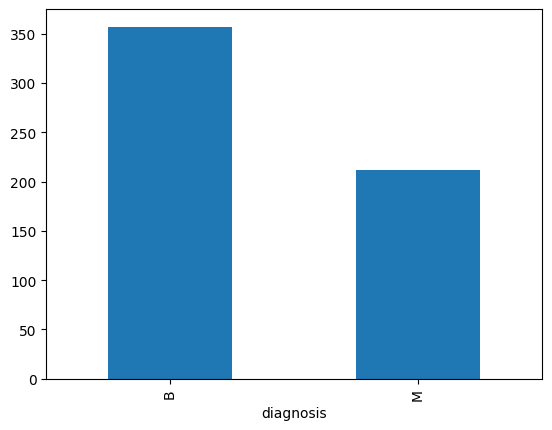

In [861]:
data_df.diagnosis.value_counts().plot(kind='bar')

2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto.

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.

Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe.

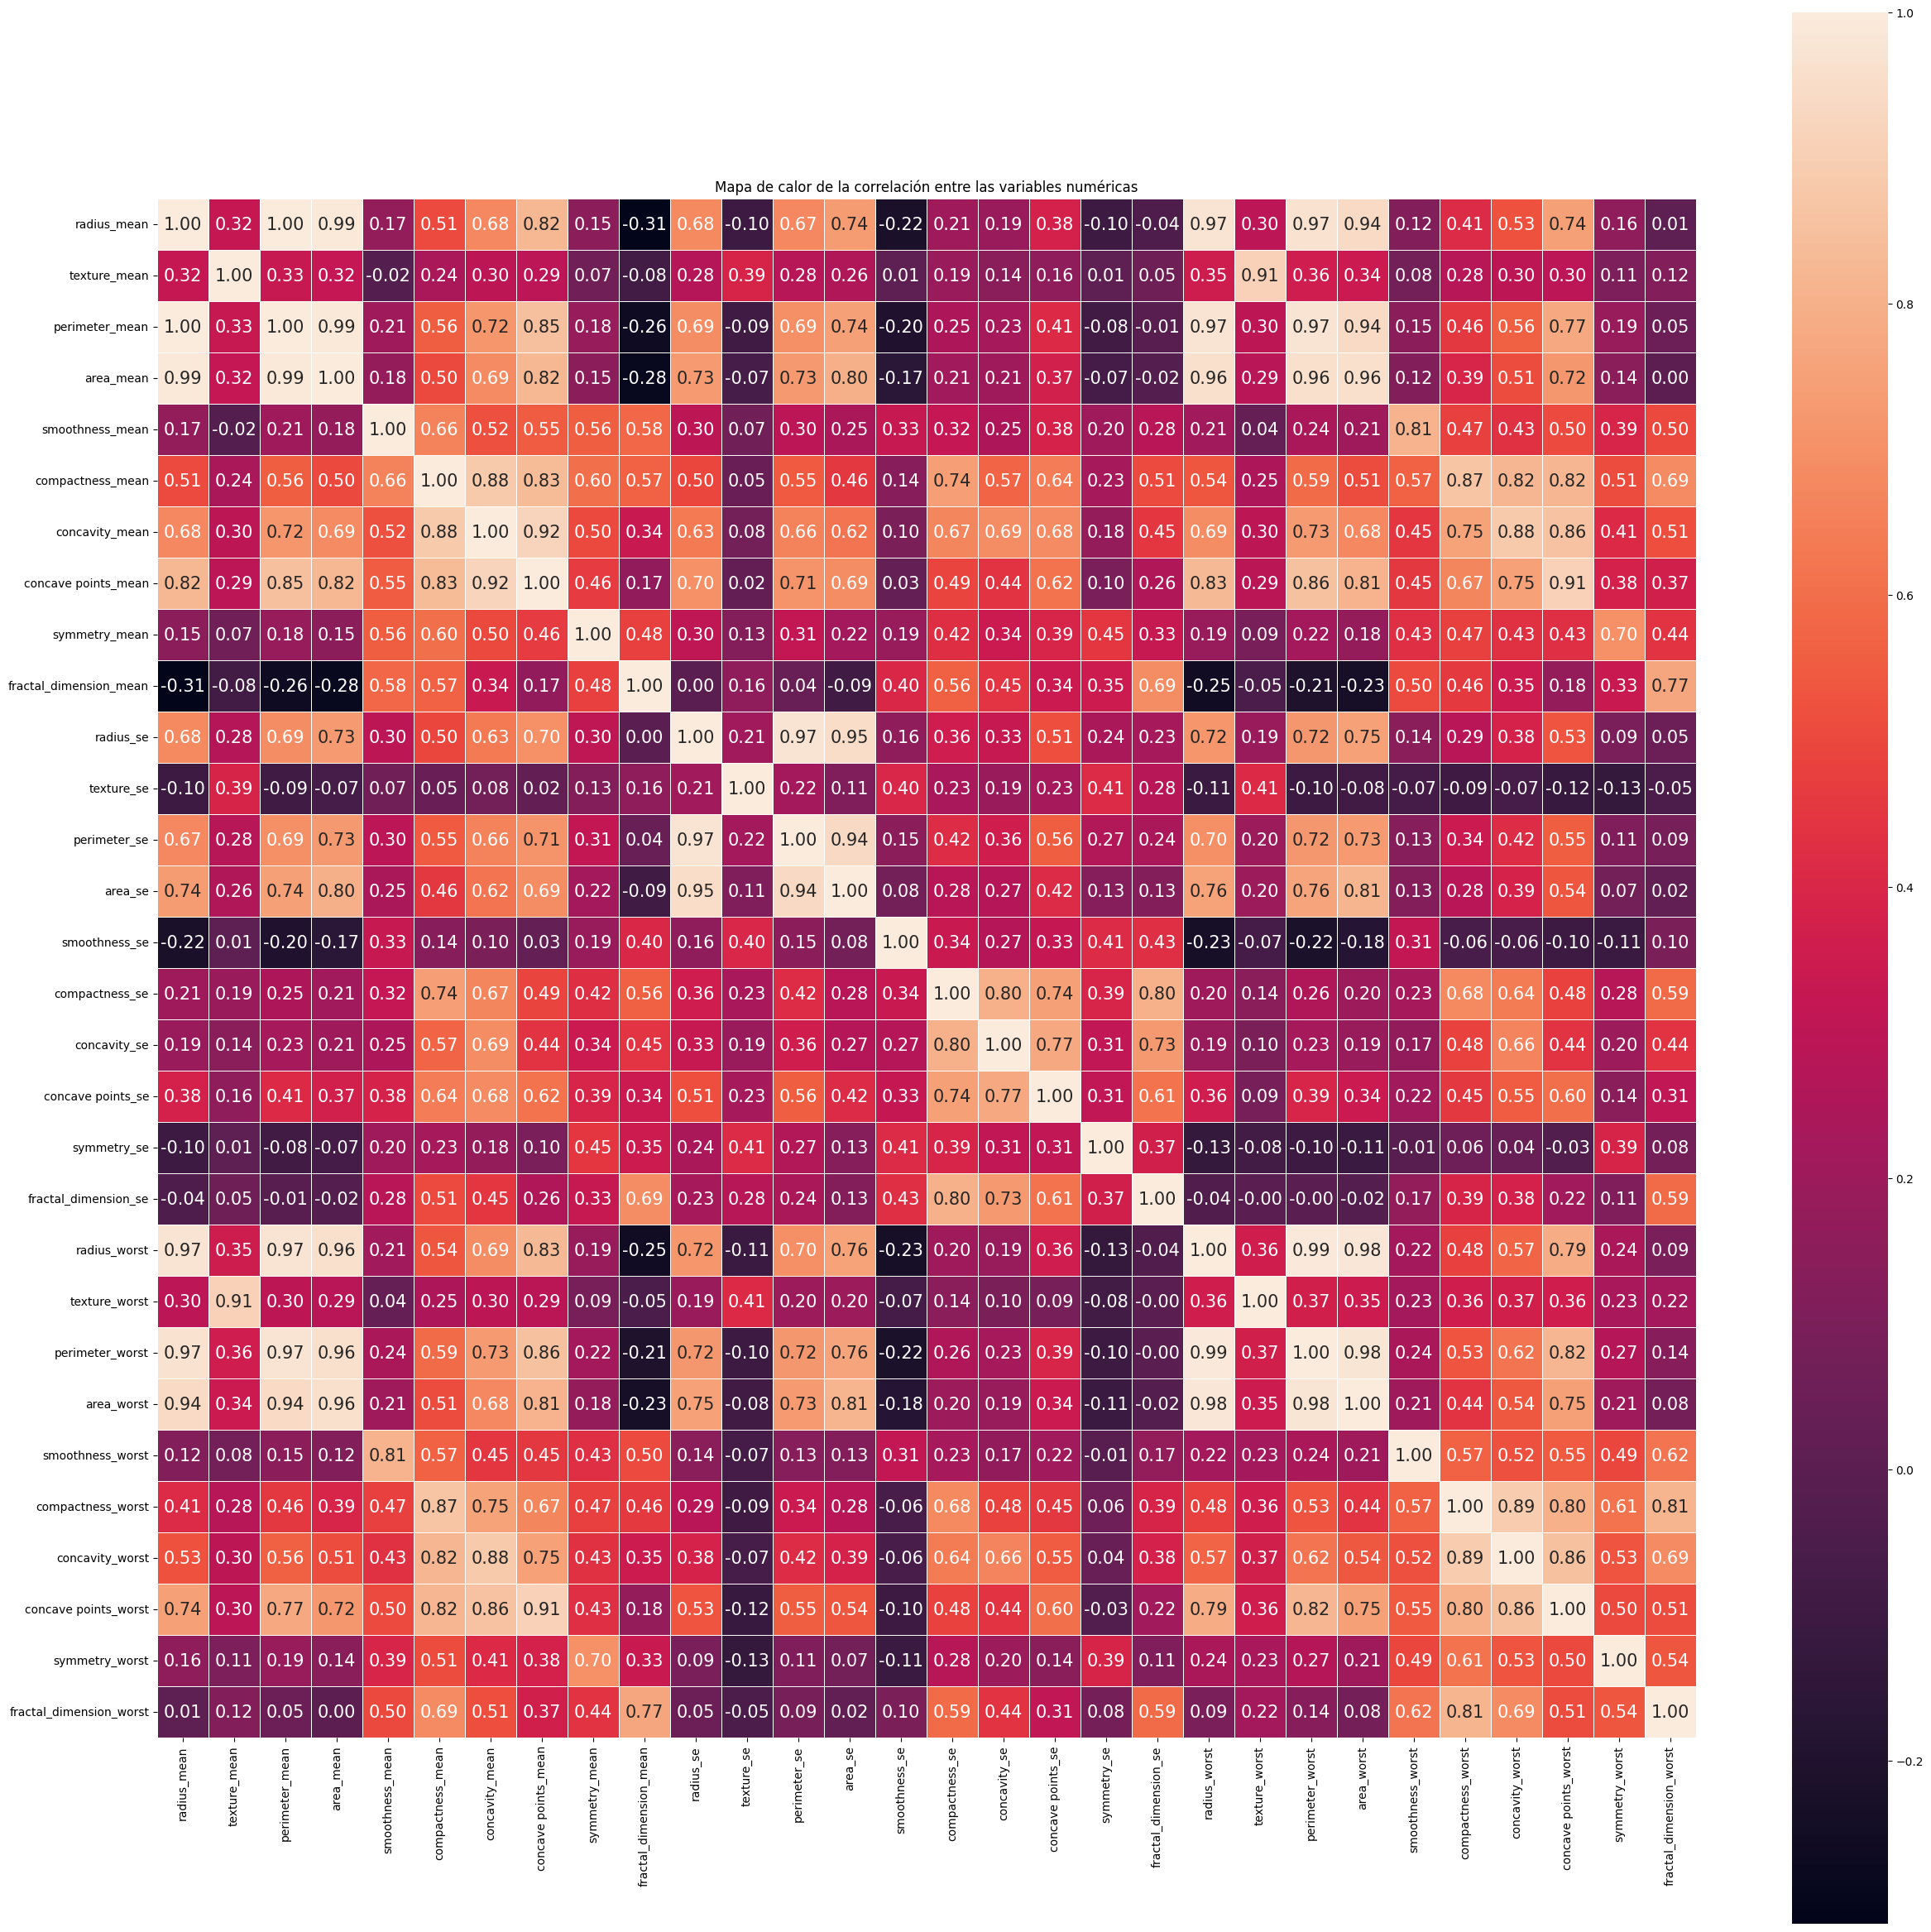

In [862]:
numeric_vars = data_df.select_dtypes(include='number').columns
correlacion = data_df[numeric_vars].corr()

plt.figure(figsize=(30, 30))
sns.heatmap(correlacion, annot=True, fmt=".2f", linewidths=0.5, annot_kws={"size": 15}, square=True)
plt.title('Mapa de calor de la correlación entre las variables numéricas')

plt.show()

Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad.

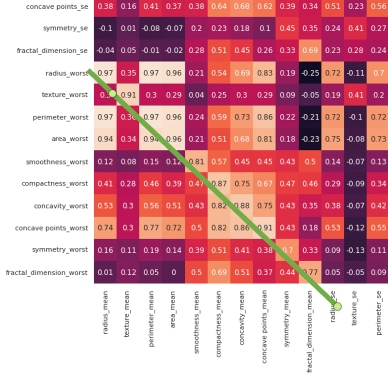

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias".

Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.

Conduciremos esta actividad en esos dos sentidos.


# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [863]:
cols_to_drop = [col for col in data_df.columns if col.endswith('_worst')]

data_df = data_df.drop(columns=cols_to_drop)

data_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115


3b. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión usando:





```Python
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])
```




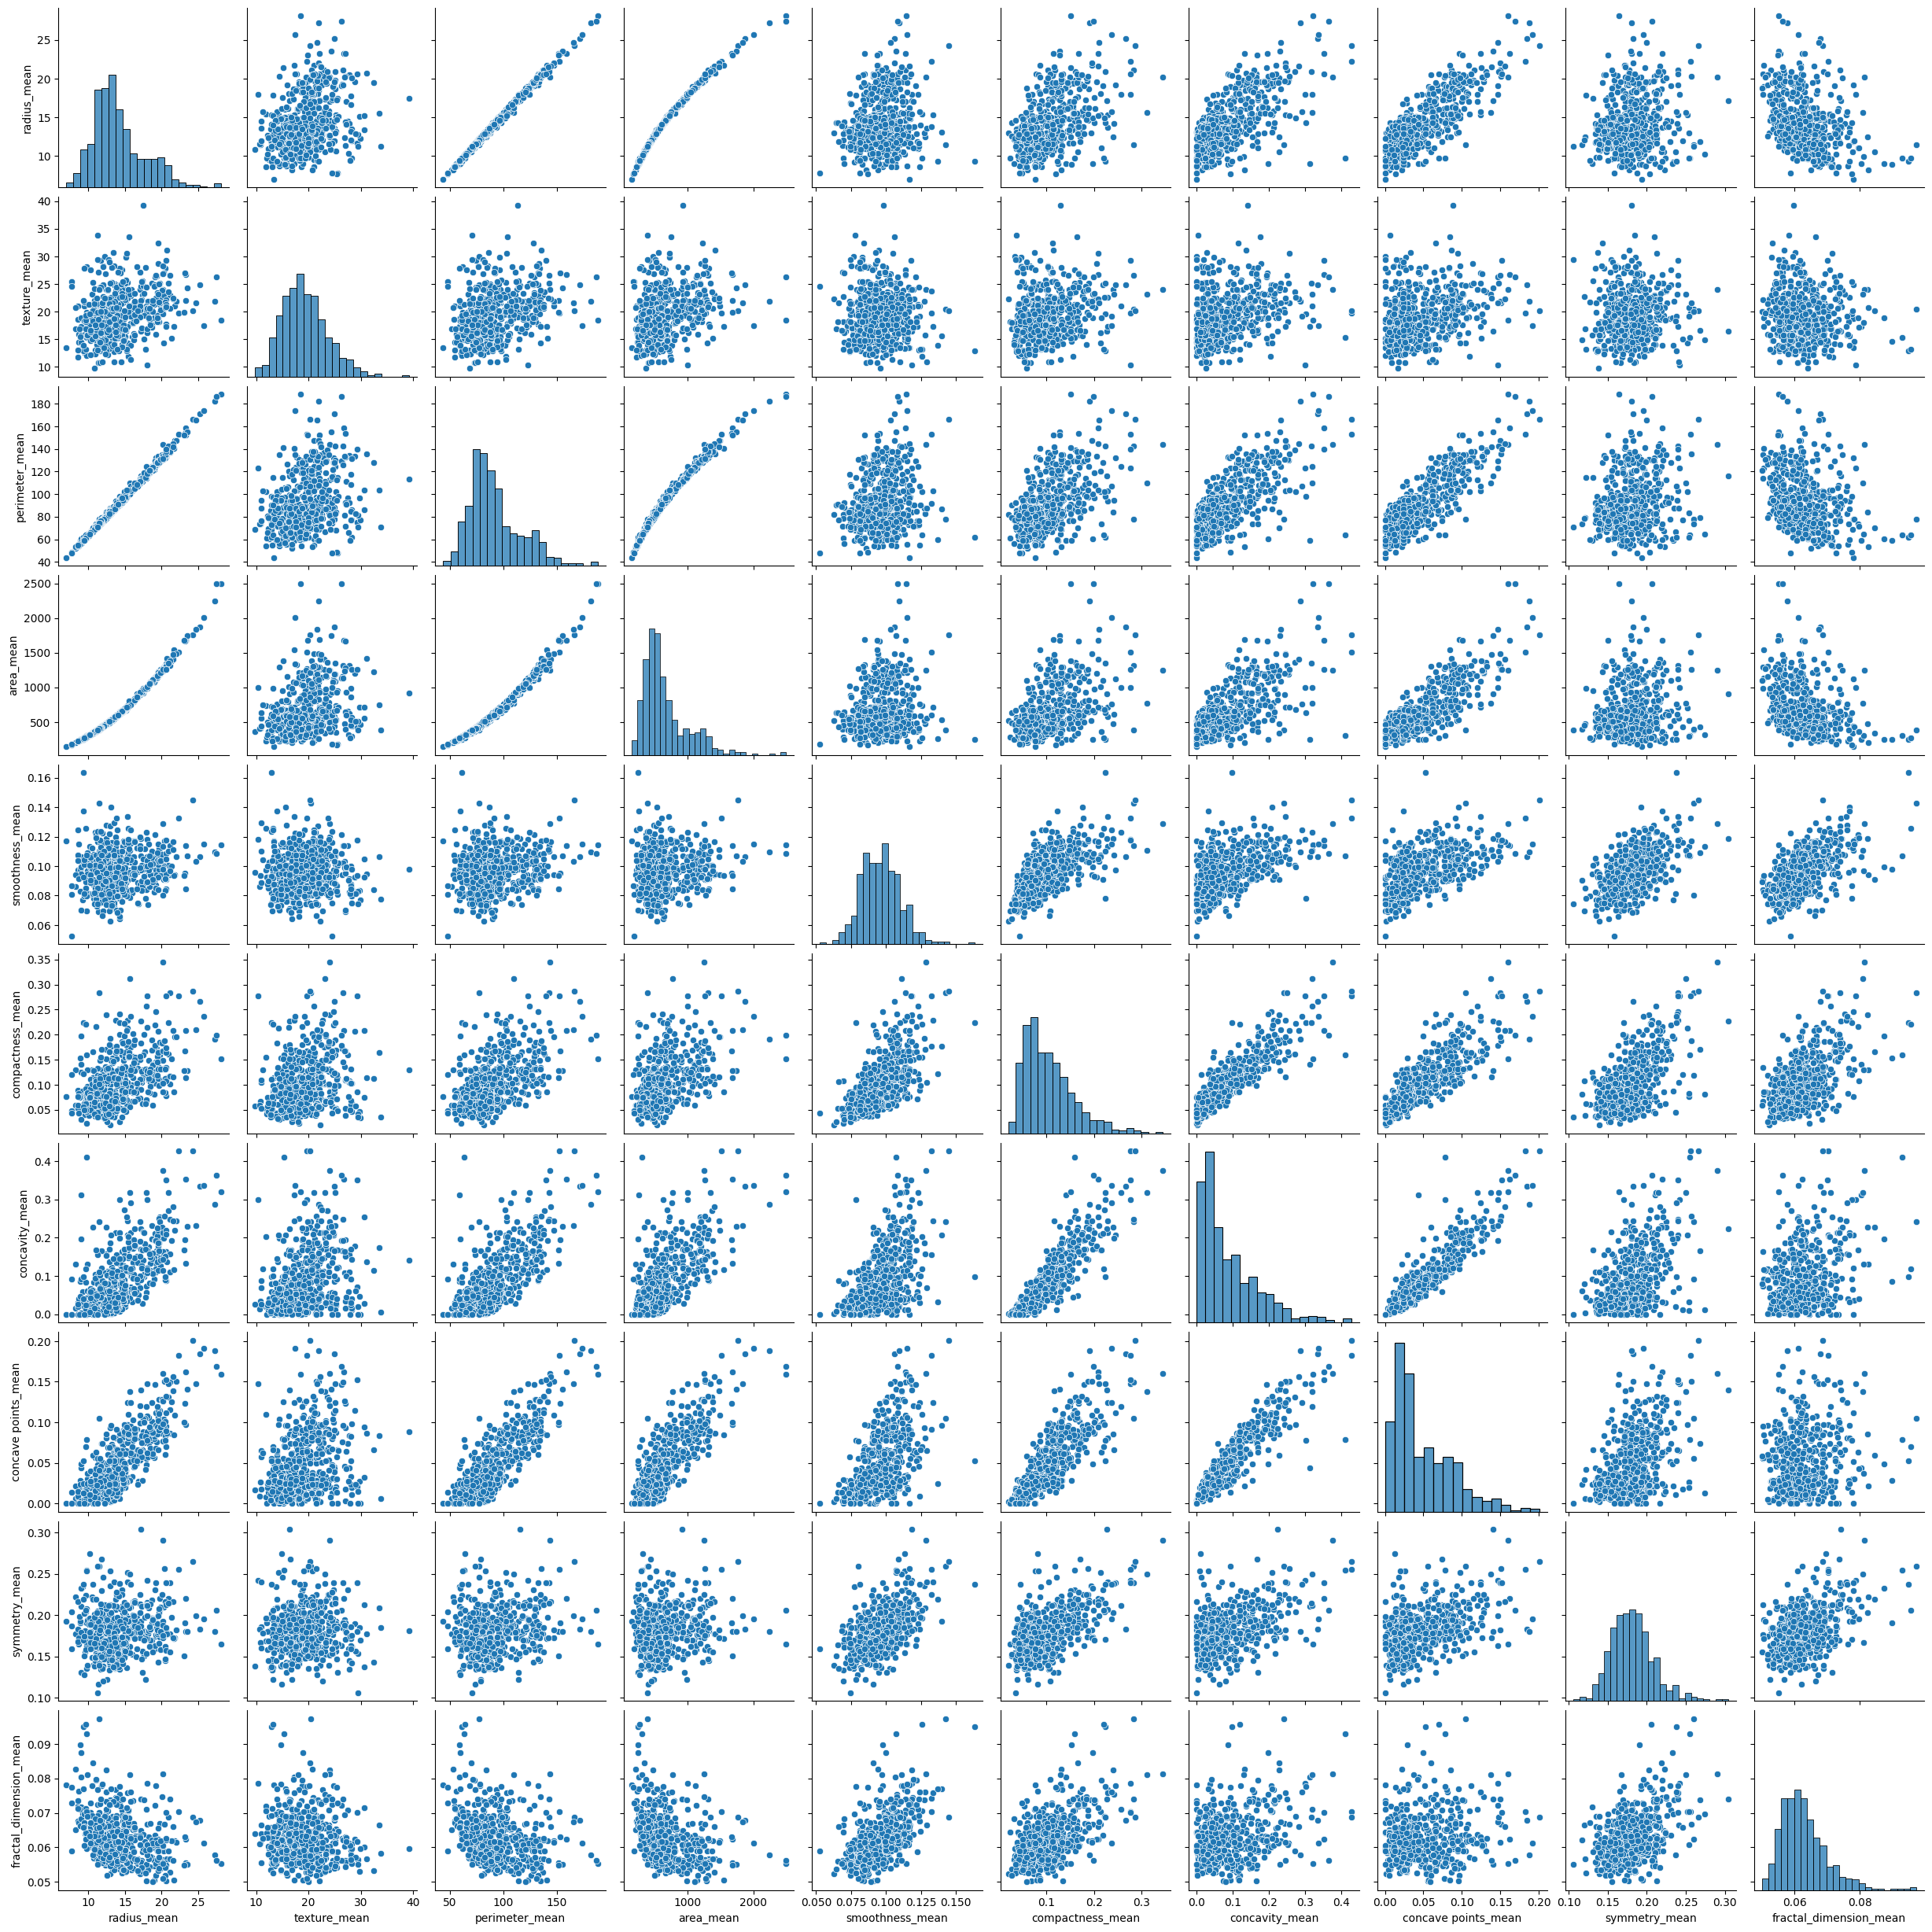

In [864]:
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])
plt.show()

De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`

Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros.

3c) Elabora otro mapa de calor confirmar con los valores de correlación.


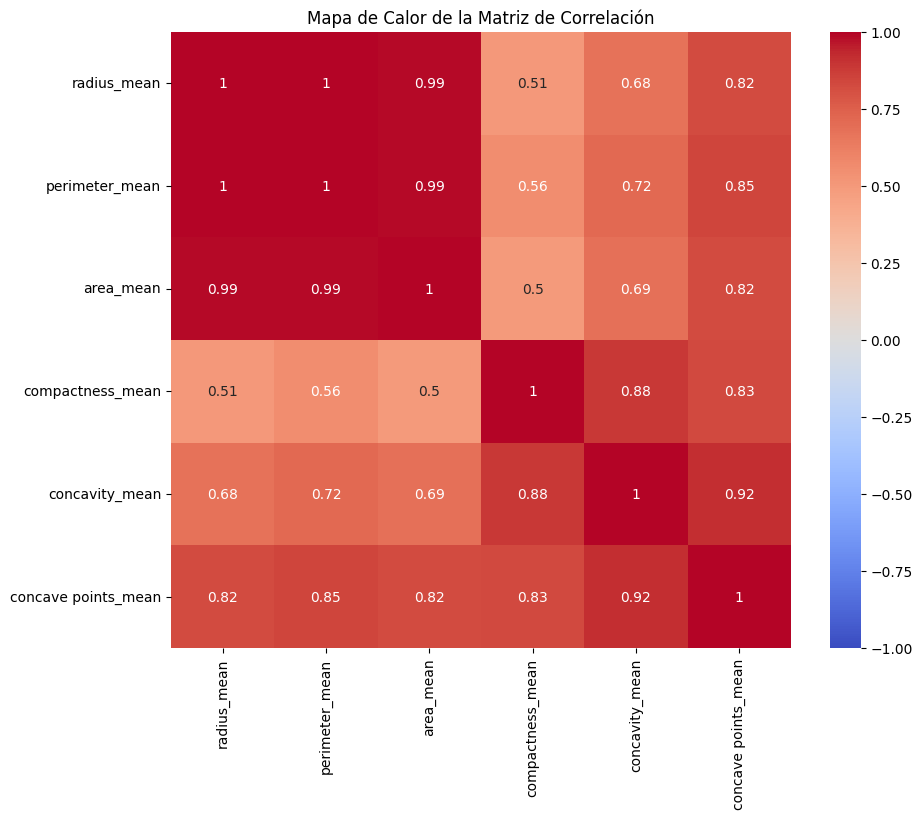

In [865]:
va_int = ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean']

correlation_matrix = data_df[va_int].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

Podemos notar en el mapa de calor, una alta relación entre: `radius_mean`, `perimeter_mean`, `area_mean`.

Asi como `compactness_mean`, `concavity_mean`, y `concave_points_mean`  

3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío: `radius_mean` y `compactness_mean`. Elimina las restantes, no sólo del conjunto `_mean`, sino también de `_se`.

In [866]:
# Borrar columnas que empiezan con 'perimeter_', 'area_', 'concavity_', 'concave points_'
borrar_columnas = ['perimeter_', 'area_', 'concavity_', 'concave points_']

for col in data_df.columns:
    for prefijo in borrar_columnas:
        if col.startswith(prefijo):
            data_df.drop(columns=col, inplace=True)

# Verificar columnas resultantes, excepto "diagnosis"
col_num = data_df[data_df.columns.difference(['diagnosis'])]
col_num.columns

Index(['compactness_mean', 'compactness_se', 'fractal_dimension_mean',
       'fractal_dimension_se', 'radius_mean', 'radius_se', 'smoothness_mean',
       'smoothness_se', 'symmetry_mean', 'symmetry_se', 'texture_mean',
       'texture_se'],
      dtype='object')

Observa la distribución de las variables resultantes (deben ser 12):

4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1.

In [867]:
skews = data_df.skew(numeric_only=True).sort_values(ascending=False)
skew_cols = skews[skews > 1]
skew_cols

fractal_dimension_se      3.923969
radius_se                 3.088612
smoothness_se             2.314450
symmetry_se               2.195133
compactness_se            1.902221
texture_se                1.646444
fractal_dimension_mean    1.304489
compactness_mean          1.190123
dtype: float64

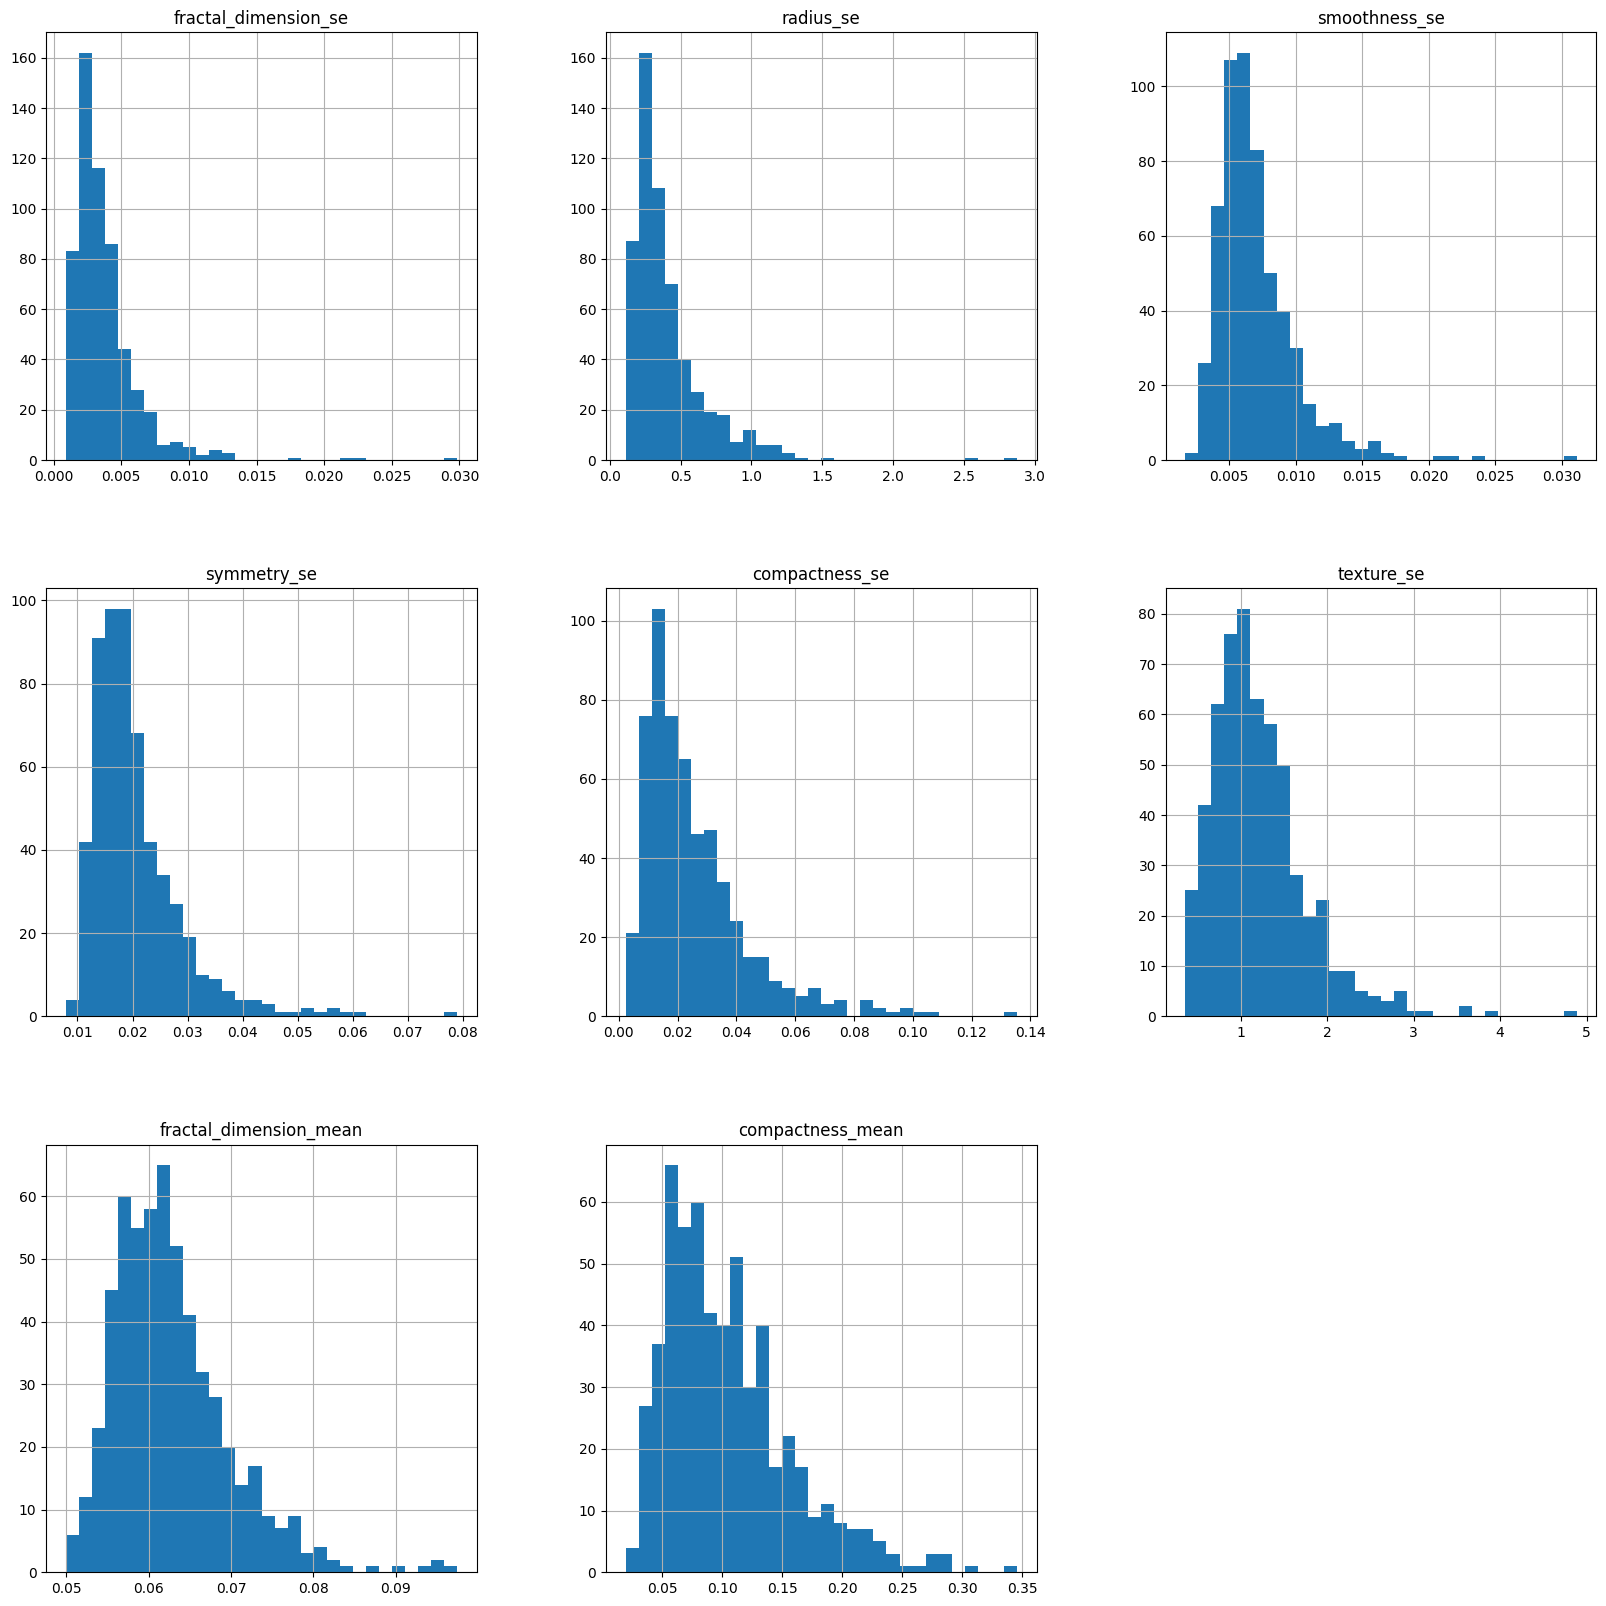

In [868]:
# Histograma de las variables con sesgo
data_df[skew_cols.index].hist(bins=30, figsize=(20, 20))
plt.show()


4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]


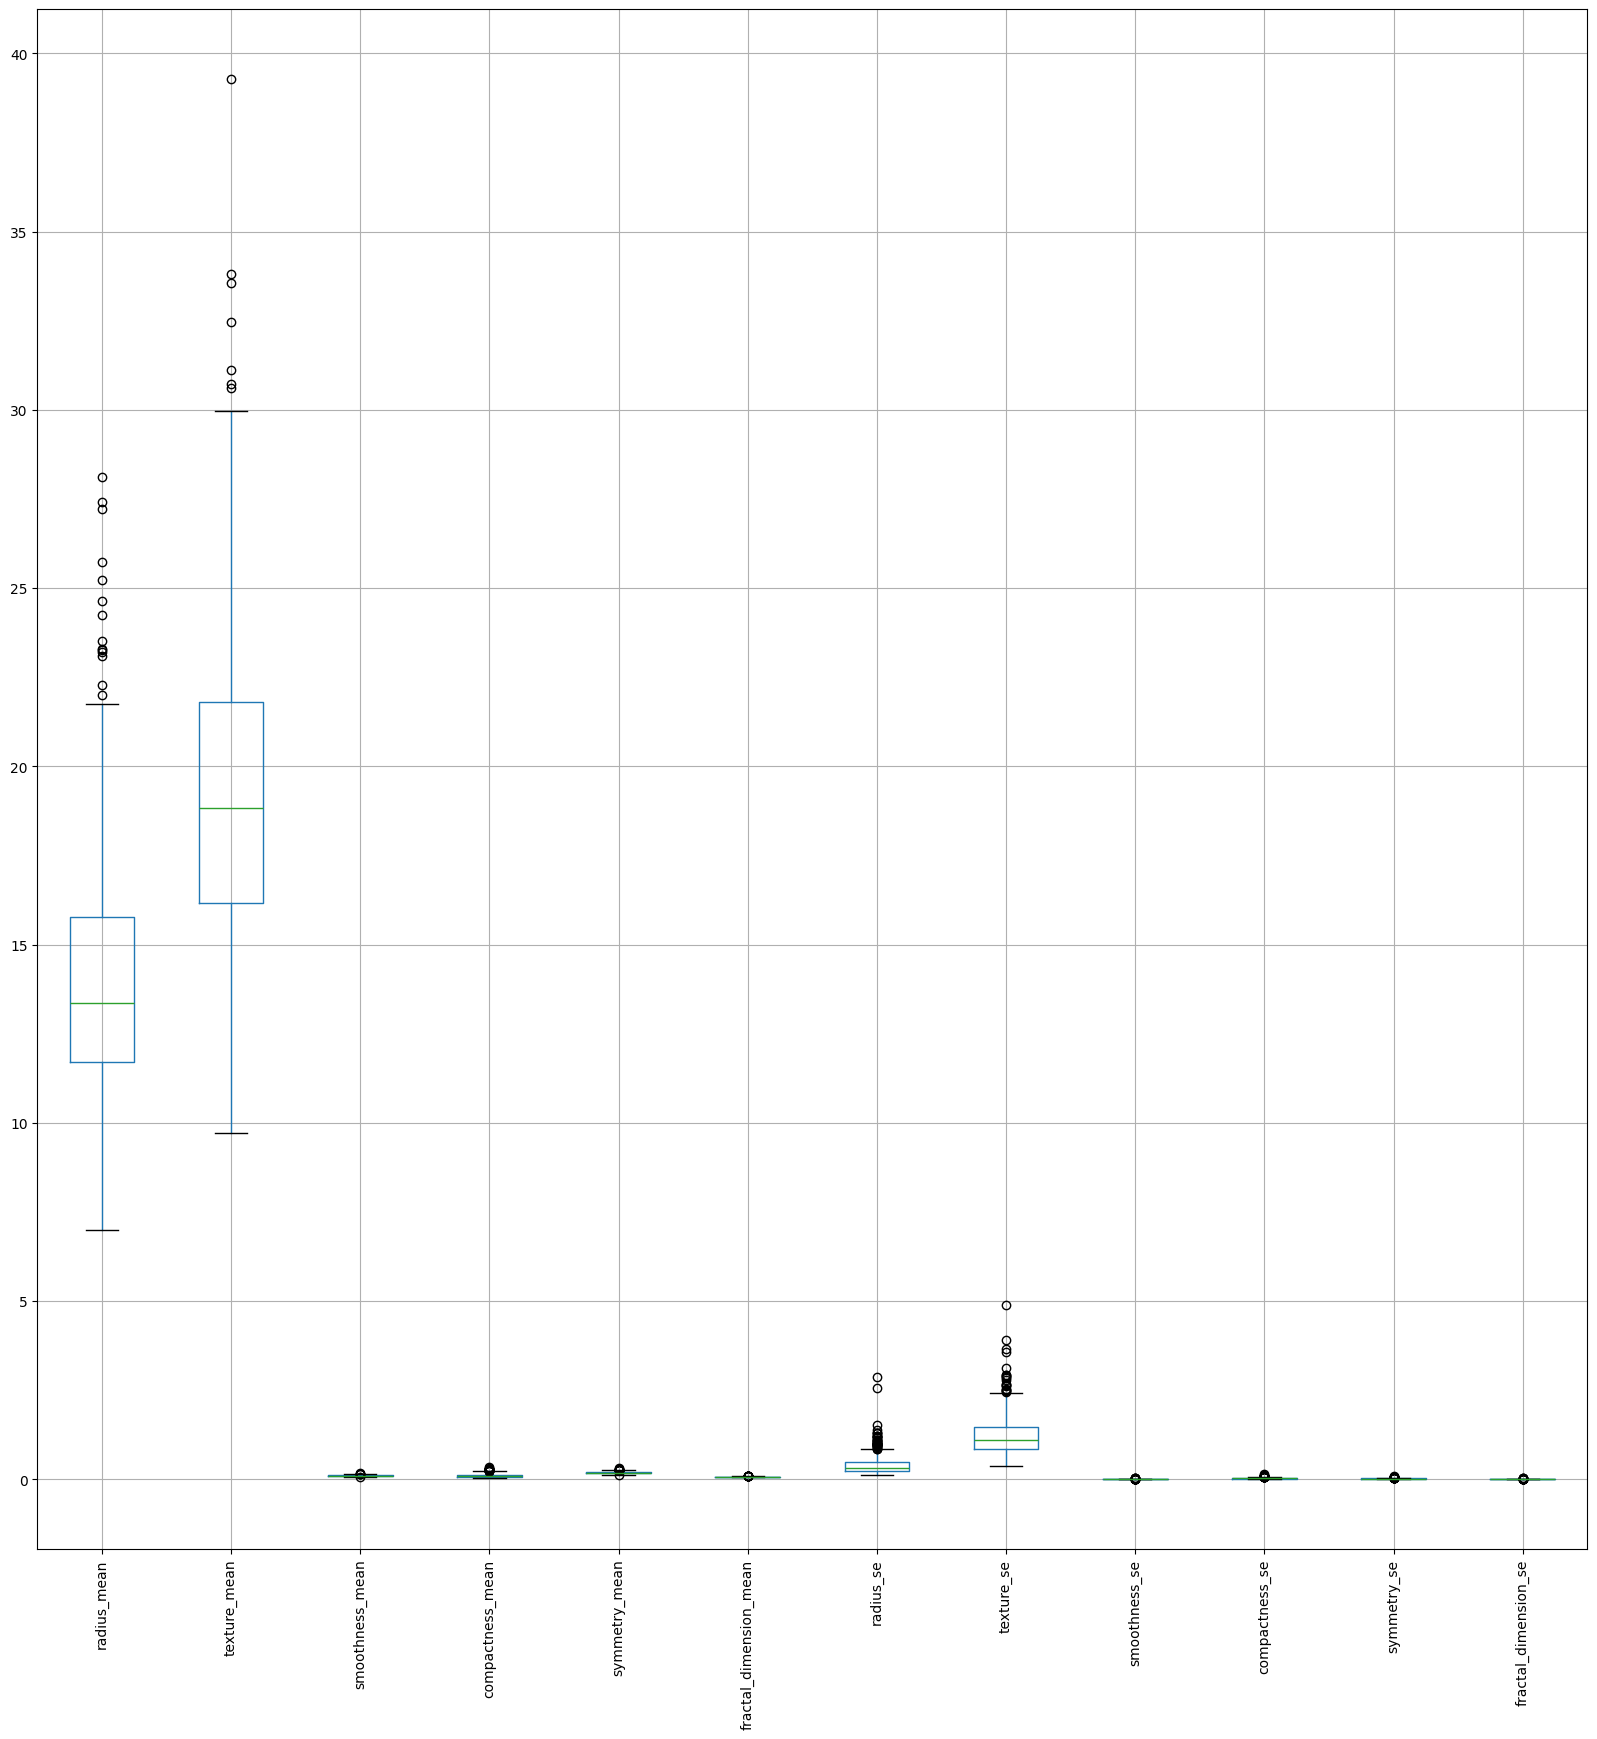

In [869]:
# Dibujando box plots de todas las variables numéricas
plt.figure(figsize=(20, 20))
data_df.boxplot(rot=90)
plt.show()

In [870]:
# Boolean mask para variables que no se encuentran en el intervalo [0,1]
scale_cols = [col for col in col_num.columns if data_df[col].min() < 0 or data_df[col].max() > 1]

print("Variables que necesitan ser escaladas (fuera del intervalo [0,1]):", scale_cols)


Variables que necesitan ser escaladas (fuera del intervalo [0,1]): ['radius_mean', 'radius_se', 'texture_mean', 'texture_se']


Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [871]:
data_df = pd.read_csv('data.csv')
data_df.set_index('id', inplace=True)

X = data_df.drop(columns=['diagnosis'])
y = data_df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')

Tamaño del conjunto de entrenamiento: (455, 30)
Tamaño del conjunto de prueba: (114, 30)


5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [872]:
cols_to_drop = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 
'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 
'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'perimeter_se', 'area_se',
'concavity_se', 'concave points_se']

# Función para eliminar las columnas específicas
def drop_columns(X):
    return X.drop(columns=cols_to_drop)

# Crear el transformador para eliminar las columnas
preprocessing = ColumnTransformer(
    transformers=[
        ('drop_cols', FunctionTransformer(drop_columns, validate=False), cols_to_drop)
    ],
    remainder='passthrough'
)

# Verificar que el transformador funciona correctamente
X_transformed = preprocessing.fit_transform(X_train)
print(f'Tamaño del conjunto de entrenamiento transformado: {X_transformed.shape}')

Tamaño del conjunto de entrenamiento transformado: (455, 12)


5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística.

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. 

Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo.

In [873]:
# Crear el pipeline y el modelo de regresión
logr_model = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('classifier', LogisticRegression())
])

logr_model.fit(X_train, y_train)
y_pred = logr_model.predict(X_test)

# Evaluar el modelo
conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
accuracy = accuracy_score(y_test, y_pred)

print("Matriz de Confusión:")
print(conf_matrix)
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Exactitud: {accuracy:.4f}")

Matriz de Confusión:
[[68  4]
 [10 32]]
Precisión: 0.8889
Recall: 0.7619
Exactitud: 0.8772


Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'`

In [874]:
skewness = X.skew()
skew_cols = skewness[skewness > 1].index.tolist()
scale_cols = [col for col in X.columns if X[col].min() < 0 or X[col].max() > 1]

def sqrt_transform(X):
    X_sqrt = X.copy()
    X_sqrt[skew_cols] = np.sqrt(X_sqrt[skew_cols])
    return X_sqrt

preprocessing = ColumnTransformer(
    transformers=[
        ('drop_cols', FunctionTransformer(drop_columns), cols_to_drop),
        ('sqrt_transform', FunctionTransformer(sqrt_transform), skew_cols),
        ('scale', MinMaxScaler(), scale_cols)
    ],
    remainder='passthrough'
)

logr_model2 = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('classifier', LogisticRegression())
])

6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

In [875]:
# Entrenar el modelo
logr_model2.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logr_model2.predict(X_test)

# Evaluar modelo
conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
accuracy = accuracy_score(y_test, y_pred)

print("Matriz de Confusión:")
print(conf_matrix)
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Exactitud: {accuracy:.4f}")

Matriz de Confusión:
[[71  1]
 [ 4 38]]
Precisión: 0.9744
Recall: 0.9048
Exactitud: 0.9561


/Users/carlospano/anaconda3/envs/cp-master-ia-tec/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Parte 3**. Modelo con aplicación de PCA

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

In [876]:
data_df = pd.read_csv('data.csv')
data_df.set_index('id', inplace=True)
X = data_df.drop(columns=['diagnosis'])
y = data_df['diagnosis']

escalar = StandardScaler()
x_scaled = escalar.fit_transform(X)

8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza.

In [877]:
# Aplicando PCA con X escalado
pca = PCA()
x_projected = pca.fit_transform(x_scaled)
x_projected = pd.DataFrame(x_projected)
print("Los valores propios (eigenvalues) para la matriz de covarianza de nuestros datos son: ", list(np.round(pca.explained_variance_, decimals=8)))

Los valores propios (eigenvalues) para la matriz de covarianza de nuestros datos son:  [13.30499079, 5.7013746, 2.82291016, 1.98412752, 1.65163324, 1.20948224, 0.67640888, 0.47745625, 0.41762878, 0.35131087, 0.29443315, 0.26162116, 0.24178242, 0.15728615, 0.0943007, 0.0800034, 0.05950361, 0.05271142, 0.0495647, 0.03121426, 0.03002566, 0.02748771, 0.02438369, 0.01808679, 0.01550853, 0.00819204, 0.00691261, 0.00159214, 0.00075012, 0.00013328]


In [878]:
for i in range(0, total_components):
  print("El porcentaje de varianza explicada por el componente principal", i+1, "es", format(pca.explained_variance_ratio_[i]*100,'2f'),'%')

El porcentaje de varianza explicada por el componente principal 1 es 44.272026 %
El porcentaje de varianza explicada por el componente principal 2 es 18.971182 %
El porcentaje de varianza explicada por el componente principal 3 es 9.393163 %
El porcentaje de varianza explicada por el componente principal 4 es 6.602135 %
El porcentaje de varianza explicada por el componente principal 5 es 5.495768 %
El porcentaje de varianza explicada por el componente principal 6 es 4.024522 %
El porcentaje de varianza explicada por el componente principal 7 es 2.250734 %
El porcentaje de varianza explicada por el componente principal 8 es 1.588724 %
El porcentaje de varianza explicada por el componente principal 9 es 1.389649 %
El porcentaje de varianza explicada por el componente principal 10 es 1.168978 %
El porcentaje de varianza explicada por el componente principal 11 es 0.979719 %
El porcentaje de varianza explicada por el componente principal 12 es 0.870538 %
El porcentaje de varianza explicada

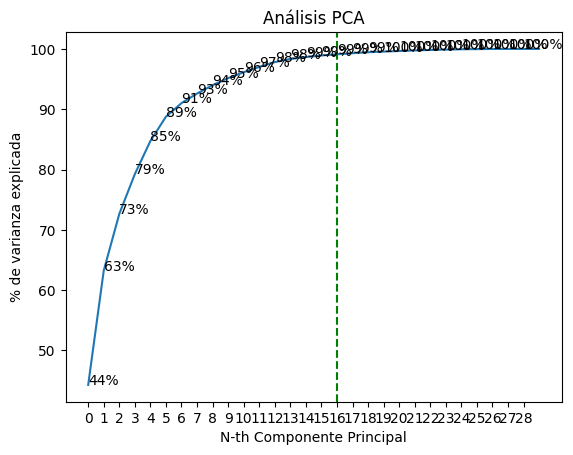

In [879]:
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100)
plt.title('Análisis PCA')
plt.xlabel('N-th Componente Principal')
plt.ylabel('% de varianza explicada')
plt.xticks(np.arange(0, total_components, 1))

labels = np.cumsum(pca.explained_variance_ratio_) * 100
for i in range(total_components):
    plt.text(i, labels[i], str(format(labels[i], '.0f')) + '%')

# Encontrar el índice donde la varianza acumulada supera el 99%
index_99 = np.argmax(np.cumsum(pca.explained_variance_ratio_) * 100 >= 99)
plt.axvline(x=index_99, color='g', linestyle='--')

plt.show()

Como podemos observar de manera gráfica, el índice al 99% de la varianza acumulada es en el **17**.
Es decir que 17 componentes principales explicarían el 99% de la varianza de la muestra inicial.

9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

In [880]:
logr_model3 = make_pipeline(StandardScaler(), PCA(n_components = 0.99), LogisticRegression())

logr_model3.fit(X_train, y_train)
predictions = logr_model.predict(X_test)

# Evaluar el modelo
conf_matrix = confusion_matrix(y_test, predictions, labels=['B', 'M'])
precision = precision_score(y_test, predictions, pos_label='M')
recall = recall_score(y_test, predictions, pos_label='M')
accuracy = accuracy_score(y_test, predictions)

print("Matriz de Confusión:")
print(conf_matrix)
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Exactitud: {accuracy:.4f}")

Matriz de Confusión:
[[68  4]
 [10 32]]
Precisión: 0.8889
Recall: 0.7619
Exactitud: 0.8772


10. En un modelo de diagnóstico médico, ¿cuál consideras que es la métrica más importante? ¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué?

Es importante recalcar que la métrica más importante puede variar de acuerdo al contexto de la información. En este ejercicio, se analizaron 569 observaciones con 32 variables para el diagnóstico de cáncer de mama. Un tema sensible al dar el diagnóstico directamente al paciente.

Dicho lo anterior, el **Recall** establece la relación entre los datos correctamente clasificados como positivos (VP) y los datos positivos totales. Al ser un diagnóstico médico, apuntamos a que el Recall sea 1. Para ello, podemos evaluar los diferentes thresholds.

El F1 score, se define como una métrica que combina la precisión y el recall en una métrica única, por lo que buscaremos el mejor threshold que de el mejor puntaje F1:

In [881]:
mejor_umbral = 0.0 # Umbral estandar en regresión lógistica. Lo establecemos en 0.0
mejor_f1_score = 0.0

# Para efectos de este ejercicio, usaremos el logr_model3 de PCA.
probabilidades = logr_model3.predict_proba(X_test)[:, 1]

# Evaluar el mismo modelo de 0 a un paso de 0.01 para obtener el mejor puntaje de f1_score
umbrales = np.arange(0.0, 1.0, 0.01)

for umbral in umbrales:
    predicciones_umbral = np.where(probabilidades >= umbral, 'M', 'B')
    f1 = f1_score(y_test, predicciones_umbral, pos_label='M')
    if f1 > mejor_f1_score:
        mejor_f1_score = f1
        mejor_umbral = umbral

# Evaluación con mejor Umbral
predicciones_finales = np.where(probabilidades >= mejor_umbral, 'M', 'B')
conf_matrix = confusion_matrix(y_test, predicciones_finales, labels=['B', 'M'])
precision = precision_score(y_test, predicciones_finales, pos_label='M')
recall = recall_score(y_test, predicciones_finales, pos_label='M')
accuracy = accuracy_score(y_test, predicciones_finales)

print(f"Mejor Umbral: {mejor_umbral:.2f}")
print("Matriz de Confusión:")
print(conf_matrix)
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Exactitud: {accuracy:.4f}")


Mejor Umbral: 0.43
Matriz de Confusión:
[[72  0]
 [ 2 40]]
Precisión: 1.0000
Recall: 0.9524
Exactitud: 0.9825


Ahora veremos las matrices de Confusión de los modelos 1, 2 y 3 para comparar:

| Modelo       | Precisión | Recall  | Exactitud |
|--------------|-----------|---------|-----------|
| logr_model1  | 0.8889    | 0.7619  | 0.8772    |
| logr_model2  | 0.9744    | 0.9048  | 0.9561    |
| logr_model3  | 0.8889    | 0.7619  | 0.8772    |
| logr_model3 (Umbral = 0.58)  | 1.0000    | 0.8810  | 0.9561    |


Si tomamos en cuenta el 'logr_model3' y 'logr_model3 (Umbral = 0.58)', vemos una mejora significativa en las tres métricas, lo cuál nos indica que utulizando el método de PCA, el mejor *threshold* es el de 0.58.

Sin embargo, que el modelo 'logr_model2' tiene un mejor balanceo en sus 3 métricas, aún cuando la precisión es casi 1 y el umbral de 0.58 es 1.